# Part I - (Analyzing Ford GoBike)
## by (Ahmad Yusuf)

## Introduction
> in this analysis i will be looking at: time of most trips taken in terms of time of day; ii. Day of the week, or month of the year? iii. How long does the average trip take? iv. Biker type of the bay Area bike share system

## Preliminary Wrangling


In [38]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [39]:
# loading dataset into  pandas dataframe
ford_bike = pd.read_csv('fordgobike.csv')
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [40]:
ford_bike.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [41]:
ford_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
ford_bike.duplicated().sum()

0

## Cleaning Data

In [42]:
#fix 1
# Fixing data types of incorrect datatypes
ford_bike['start_time'] = pd.to_datetime(ford_bike['start_time'])
ford_bike['end_time'] = pd.to_datetime(ford_bike['end_time'])

ford_bike['user_type'] = ford_bike['user_type'].astype('category')
ford_bike['member_gender'] = ford_bike['member_gender'].astype('category')

ford_bike['start_station_id'] = ford_bike['start_station_id'].astype('str')
ford_bike['end_station_id'] = ford_bike['end_station_id'].astype('str')
ford_bike['bike_id'] = ford_bike['bike_id'].astype('str')

ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [43]:
# fix 2
# Adding new olumns of trip; duration in minute, trip start hour of the day, trip start day of the week, start month
ford_bike['duration_minute'] = ford_bike['duration_sec']/60

ford_bike['start_date'] = ford_bike.start_time.dt.strftime('%Y-%m-%d')
ford_bike['start_hour_of_day'] = ford_bike.start_time.dt.strftime('%H')
ford_bike['start_day_of_week'] = ford_bike.start_time.dt.strftime('%A')
ford_bike['start_month'] = ford_bike.start_time.dt.strftime('%B')

ford_bike.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
1             23.0                     The Embarcadero at Steuart St   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
1               37.791464              -122.391034           81.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1                            Berry St at 4th St             37.775880  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   

   bike_id   user_type member_birth_year  member_gender  \
0     4902    Customer            1984.0           Male   
1     2535    Customer               NaN            NaN   
2     5905    Customer            1972.0           Male   
3     6638  Subscriber            1989.0          Other   
4     4898  Subscriber            1974.0           Male   

  bike_share_for_all_trip duration_minute  start_date start_hour_of_day  \
0                      No      869.750000  2019-02-28                17   
1                      No      708.683333  2019-02-28                18   
2                      No     1030.900000  2019-02-28                12   
3                      No      608.166667  2019-02-28                17   
4                     Yes       26.416667  2019-02-28                23   

  start_day_of_week start_month  
0          Thursday    February  
1          Thursday    February  
2          Thursday    February  
3          Thursday    February  
4          Thursday    February  

[5 rows x 21 columns]

In [45]:
# fix 3: add a new column calculating riders' age from 'member_birth_year'

ford_bike['member_age'] = 2022 - ford_bike['member_birth_year']
ford_bike.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  \
count         183412.000000          183412.000000      175147.000000   
mean              37.771427            -122.352250        1984.806437   
std                0.099490               0.116673          10.116689   
min               37.317298            -122.453704        1878.000000   
25%               37.770407            -122.411726        1980.000000   
50%               37.781010            -122.398279        1987.000000   
75%               37.797320            -122.288045        1992.000000   
max               37.880222            -121.874119        2001.000000   

       duration_minute     member_age  
count    183412.000000  175147.000000  
mean         12.101307      37.193563  
std          29.906496      10.116689  
min           1.016667      21.000000  
25%           5.416667      30.000000  
50%           8.566667      35.000000  
75%          13.266667      42.000000  
max        1424.066667     144.000000

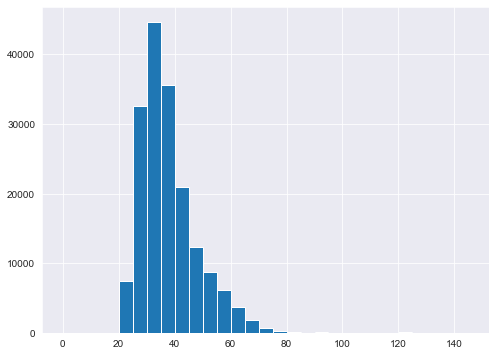

In [46]:
# plot the distribution of members' age, visually examine for some outliers over 100 yrs old

plt.figure(figsize=[8, 6])
bins = np.arange(0, ford_bike['member_age'].max()+5, 5)
plt.hist(ford_bike['member_age'].dropna(), bins=bins);

In [47]:
# fix 4: filter out outlier ages from visually examination of the distribution above
ford_bike = ford_bike.query('member_age <= 70')

In [48]:
# fix 5: cast 'member_birth_year' and 'member_age' to integer instead of float type

ford_bike['member_birth_year'] = ford_bike['member_birth_year'].astype('int')
ford_bike['member_age'] = ford_bike['member_age'].astype('int')
ford_bike.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174115 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174115 non-null  int64         
 1   start_time               174115 non-null  datetime64[ns]
 2   end_time                 174115 non-null  datetime64[ns]
 3   start_station_id         174115 non-null  object        
 4   start_station_name       173920 non-null  object        
 5   start_station_latitude   174115 non-null  float64       
 6   start_station_longitude  174115 non-null  float64       
 7   end_station_id           174115 non-null  object        
 8   end_station_name         173920 non-null  object        
 9   end_station_latitude     174115 non-null  float64       
 10  end_station_longitude    174115 non-null  float64       
 11  bike_id                  174115 non-null  object        
 12  user_type       

In [49]:
ford_bike.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   
5             93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   
5               37.770407              -122.391198          323.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   
5                            Broadway at Kearny             37.798014  ...   

    user_type member_birth_year member_gender  bike_share_for_all_trip  \
0    Customer              1984          Male                       No   
2    Customer              1972          Male                       No   
3  Subscriber              1989         Other                       No   
4  Subscriber              1974          Male                      Yes   
5  Subscriber              1959          Male                       No   

  duration_minute  start_date  start_hour_of_day start_day_of_week  \
0      869.750000  2019-02-28                 17          Thursday   
2     1030.900000  2019-02-28                 12          Thursday   
3      608.166667  2019-02-28                 17          Thursday   
4       26.416667  2019-02-28                 23          Thursday   
5       29.883333  2019-02-28                 23          Thursday   

  start_month member_age  
0    February         38  
2    February         50  
3    February         33  
4    February         48  
5    February         63  

[5 rows x 22 columns]

### What is the structure of your dataset?

> 183412 rows x 16 columns

### What is/are the main feature(s) of interest in your dataset?

> i am intrigued in exploring some of the following:
i. The duration of rides
ii. Riders user type
iii. Gender
iv. Age.
This will definitely help me in ascertaining the use case of these bikes


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>i. Start date/time and duration will help in asissting to know how long a trip usually takes and when.
ii. User type, gender and age will help  find out who are the main target customer groups, use the different groups to summarize bike usage data to see if there is any special pattern associated with a specific group of riders.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


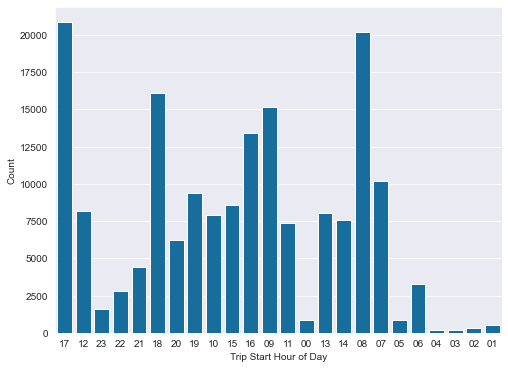

In [50]:
# trips distribution over day/hours

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=ford_bike, x='start_hour_of_day', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

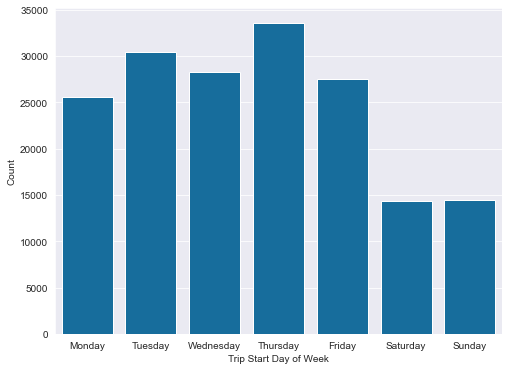

In [51]:
# trip distribution over weekdays
# issue 6: cast 'start_dayofweek' to category dtype

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
ford_bike['start_day_of_week'] = ford_bike['start_day_of_week'].astype(weekdaycat)

sb.countplot(data=ford_bike, x='start_day_of_week', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

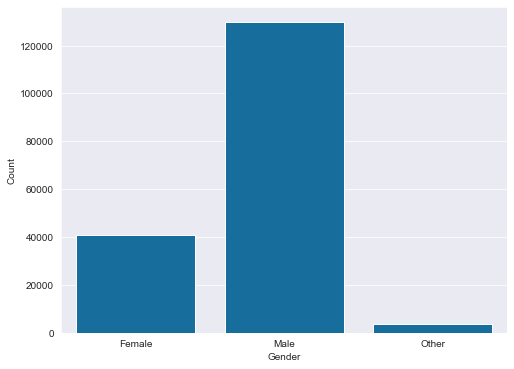

In [52]:
sb.countplot(data=ford_bike, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

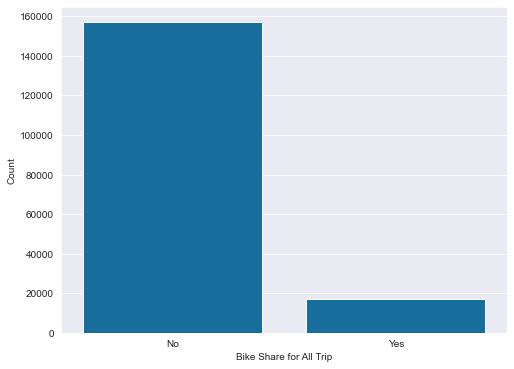

In [17]:
sb.countplot(data=ford_bike, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

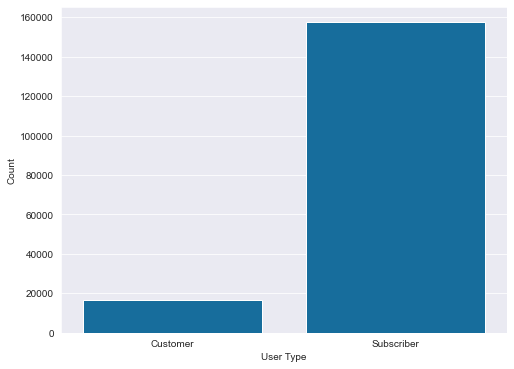

In [53]:
sb.countplot(data=ford_bike, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');

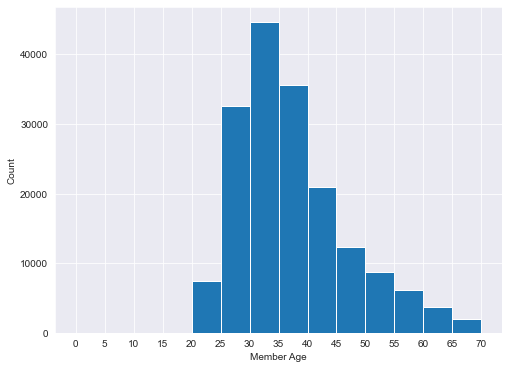

In [54]:
bins = np.arange(0, ford_bike['member_age'].max()+5, 5)
plt.hist(data=ford_bike, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

> Most riders were male subscribers who did not use bike share for all trips. Most members were around 20 to 70 years old, corresponding to the trip distribution plots that most trips were on Mon-Fri and maxed during rush hours of a day. As the age gets older, bike usage dropped significantly.



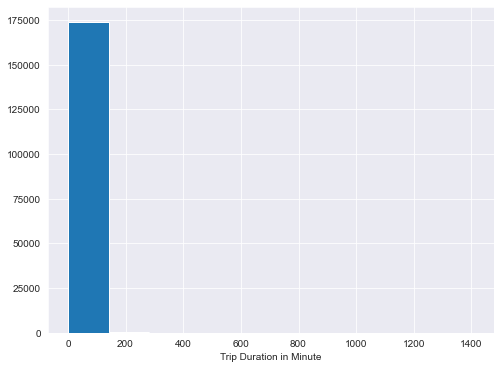

In [55]:
plt.hist(data=ford_bike, x='duration_minute');
plt.xlabel('Trip Duration in Minute');

> It was a little surprising to see the duration distribution spans pretty far to the right (indicates a long time rental, almost 24 hrs) while the majority of the rides were quite short (within 180 mins). Going to zoom in to the most cases for a closer picture of what the distribution is like.



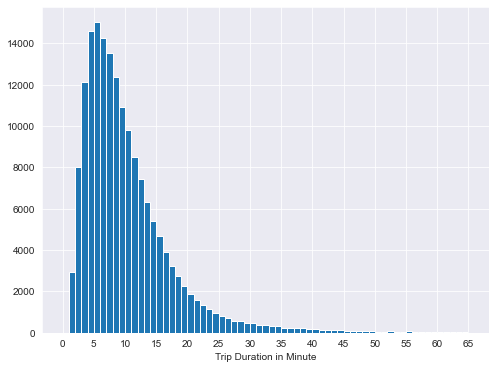

In [56]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=ford_bike, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

> It looks like 99% of the trips were less than 1 hour long with most of them fell between 5 to 10 minutes range. I'll remove the outlier long trips for this study to allow focusing on the most common cases to explore the pattern.



In [57]:
trips18 = ford_bike.query('duration_minute <= 66')
trips18.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172902 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             172902 non-null  int64         
 1   start_time               172902 non-null  datetime64[ns]
 2   end_time                 172902 non-null  datetime64[ns]
 3   start_station_id         172902 non-null  object        
 4   start_station_name       172709 non-null  object        
 5   start_station_latitude   172902 non-null  float64       
 6   start_station_longitude  172902 non-null  float64       
 7   end_station_id           172902 non-null  object        
 8   end_station_name         172709 non-null  object        
 9   end_station_latitude     172902 non-null  float64       
 10  end_station_longitude    172902 non-null  float64       
 11  bike_id                  172902 non-null  object        
 12  user_type       

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip distribution of trips hours peaks around two timeframes, 17hours and 8hours. Looking at the trip distribution over day of week plot, trips were higher on thursday and throughout the week which further implies that most usage are for commuting to work. In the 12 months in 2018, October had the most ride trips compared to the others, but overall it was the most popular during summer time (May-Sept), probably due to the weather in the area.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of the trip duration was a little surprising at first plotting out the original data. Used .describe() and xticks() to zoom in to a smaller range where most trip records fell, which made the distribution much clearer. In order to help focusing on the main cases of typical use of the system, I filtered out the outlier long trip records for the study with .query().



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

How does the trip duration distribution vary by gender?

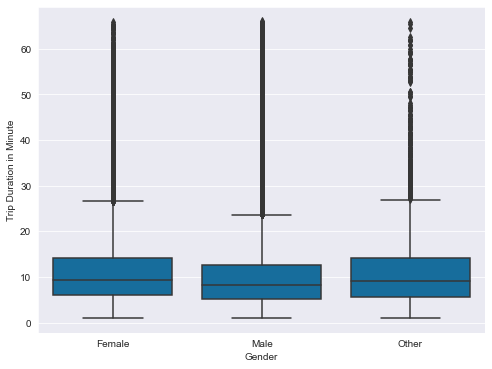

In [58]:
sb.boxplot(data=trips18, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

> female riders have longer trips compared to male users.

How does the trip duration distribution vary between customers and subscribers?


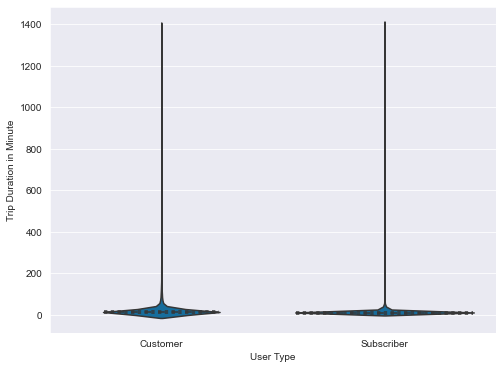

In [59]:
sb.violinplot(data=ford_bike, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

> The trip duration distribution is much narrower for subscribers compared to casual riders on the shorter/quicker trip end overall. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.


Average Trip Duration on Weekdays

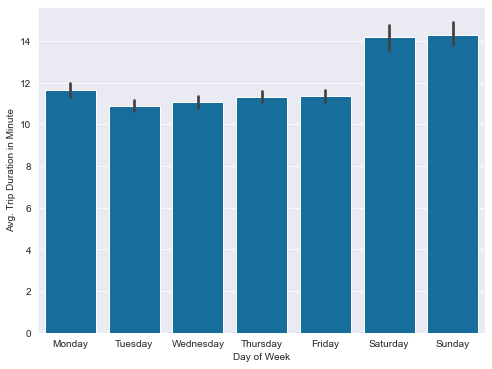

In [34]:
sb.barplot(data=ford_bike, x='start_day_of_week', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

Member age by week

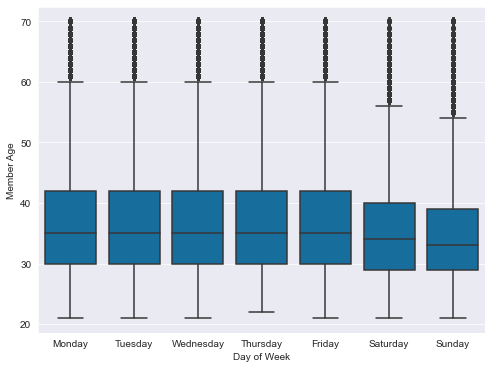

In [35]:
sb.boxplot(data=ford_bike, x='start_day_of_week', y='member_age', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

> Members are slighty odler during the week than members during weekends

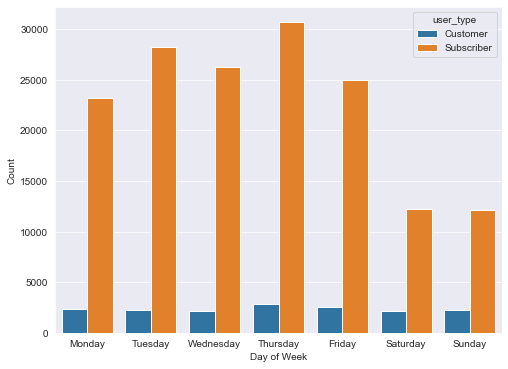

In [60]:
# weekly usage between custmers and members
sb.countplot(data=ford_bike, x='start_day_of_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

> overall, We have more subscriber usage than casual customers. During the weekends theres drop of subscribers , which indicates that they primarily ride bikes to commute to work during weekdays, while for weekends its for leisure.

Daily usage between customers and subscribers

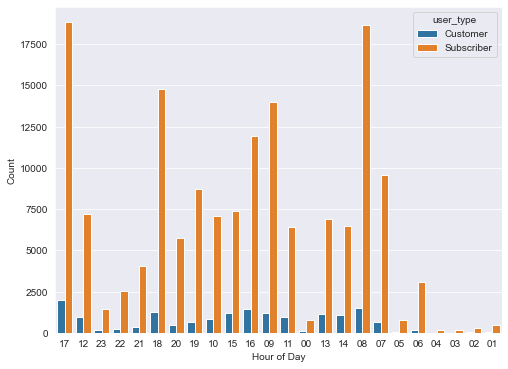

In [61]:
sb.countplot(data=ford_bike, x='start_hour_of_day', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

> subscriber usage peaks at 0800hours and 1700hours which is usually rush hour time for work which validate the subscribers purpose.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> customers tend to ride more during weekends which shows that subscribers only ride to a particular place during the week which is to thier work place.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that subscribers are slightly older than customers on average but take much shorter/quicker rides. And October had the most bike riding usage for subscribers throughout the year.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

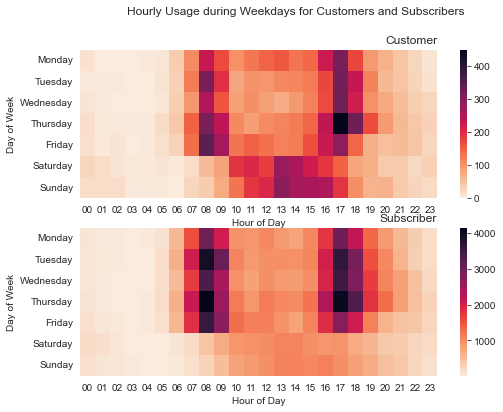

In [62]:
# How does the hourly usage vary during weekdays for customers and subscribers?
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = ford_bike.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = ford_bike.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day_of_week', 'start_hour_of_day']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

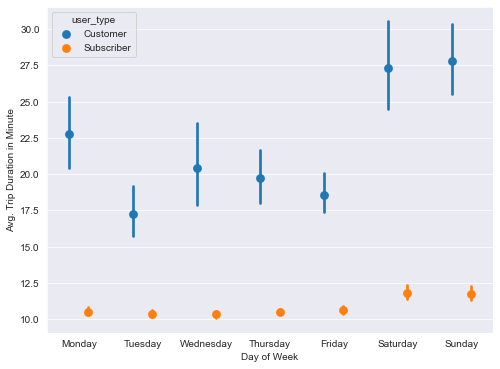

In [63]:
# How does the average trip duration vary in weekdays between customers and subscribers?
sb.pointplot(data=ford_bike, x='start_day_of_week', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

>It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The efficient period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike sharing system quite differently from the subscribers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.

### Were there any interesting or surprising interactions between features?

> The interactions between features are all supplementing each other and quite make sense when looked at combined, there's no big surprise observed. The usage habit difference between male and female is not that much or obvious throughout the exploration, which could be related to the imbalanced number of female riders/records compared to male ones. It'd be interesting to see how male and female use the system differently if there were more female data.